In [113]:
from getConfig import getConfig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
config = getConfig()
df = pd.read_csv(config["dataLoc"]+"AC.csv", na_values=" -  ")

before = df.shape[0]
df = df.loc[df["Category"]== "LABOR"]
after = df.shape[0]
print("{:,.0f} rows removed; {:,.0f} remaining".format((before-after), after))

6,022 rows removed; 1,101 remaining


##### Get Plan

In [96]:
def getSum(grp):
    d = {}
    for k, v in grp:
        d[k] = int(v[' 2016 12 YTD '].sum())
    return d

In [97]:
plan = df.loc[df["Scenario"]== "LRBP2016_Final"]
plan.set_index("Program", inplace=True)
grp = plan.groupby(level=0)
plan = getSum(grp)

##### Now Actual

In [99]:
actual = df.loc[df["Scenario"]== "LRBP2017_Final"]
actual.set_index("Program", inplace=True)
grp = actual.groupby(level=0)
actual = getSum(grp)

In [112]:
p = []
a = []
for k in plan.keys():
    p.append(plan[k])
    a.append(actual[k])
p = np.array(p)
a = np.array(a)

In [117]:
np.corrcoef(a,p)

array([[1.        , 0.93180181],
       [0.93180181, 1.        ]])

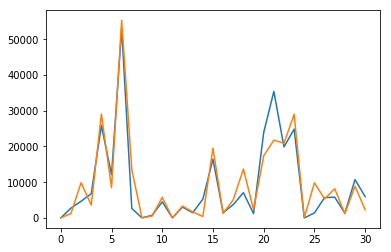

In [114]:
plt.plot(p)
plt.plot(a)
plt.show()

In [130]:
from calcMAPE import calcMAPE

In [135]:
totalMAPE = 0
print("{:<30}{}".format("Program", "MAPE"))
for k in plan.keys():
    if plan[k]> 0:
        mape = calcMAPE(plan[k], actual[k])
        totalMAPE += mape
        print("{:<30}{:.2%}".format(k,mape))
print(totalMAPE/len(plan.keys()))

Program                       MAPE
AMS_R2018                     55.00%
BGS_NonUSG_Apache_R2018       111.00%
BGS_USNUSMC_Training_R2018    47.00%
BGS_F18_R2018                 12.00%
BGS_NonUSG_F18_R2018          30.00%
BGS_C17_Support_R2018         4.00%
BGS_V22_R2018                 408.00%
Missile_Support_History_R2018 96.00%
BGS_C17_Training_R2018        31.00%
BGS_DLA_F18_R2018             28.00%
INTL_ KC46_SUPT_R2018         100.00%
BGS_Chinook_R2018             10.00%
BGS_C40A_R2018                16.00%
BGS_KC46_R2018                93.00%
BGS_DLA_R2018                 19.00%
BGS_P8_R2018                  13.00%
BGS_AV8_R2018                 37.00%
BGS_Apache_R2018              94.00%
BGS_BSAS-SOFSA-MELB_R2018     92.00%
BGS_F22_R2018                 27.00%
BGS_NonUSG_F15_R2018          39.00%
TOTF15_R2018                  5.00%
BGS_AFS_Training_R2018        17.00%
BGS_Enterprise_R2018          599.00%
BGS_T45_R2018                 6.00%
BGS_NonUSG_Intl Tanker_R2018  40.00%
BG

In [137]:
planSum = 0
actSum = 0
for k in plan.keys():
    planSum += plan[k]
    actSum += actual[k]

In [140]:
planSum,actSum

(287516, 299303)

In [149]:
actual["BGS_AFS_Training_R2018"]

29013